In [1]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1770 sha256=2daa155571527183050853483eea947d711731a78323d223d3f16d8257bc9a0c
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3875 sha256=e7d7a2beb387ebfab2c51cb1de7c09e4095f96a3efc3e77f9320fc105146389b
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31663 sha256=e87442f69965ccc5e0e3dc16232a3f4eb3a478ffe7a9317e09f259f27c1695c0
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [24]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect('sample.sqlite')

In [10]:
# Converting In DF
account_df = pd.read_sql_query("SELECT * FROM account;", conn)
iap_purchase_df = pd.read_sql_query("SELECT * FROM iap_purchase;", conn)
account_date_session_df = pd.read_sql_query("SELECT * FROM account_date_session;", conn)

In [11]:
conn.close()

In [13]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.4 MB/s eta 0:00:00


In [16]:
with pd.ExcelWriter('output_data.xlsx', engine='xlsxwriter') as writer:
    account_df.to_excel(writer, sheet_name='account', index=False)
    iap_purchase_df.to_excel(writer, sheet_name='iap_purchase', index=False)
    account_date_session_df.to_csv('account_date_session.csv', index=False)

### 1. Give us short description of datasets.

In [35]:
# 1. Give us short description of datasets

print("Account Dataset:")
print(account_df.info())

print("\nIn-App Purchase Dataset:")
print(iap_purchase_df.info())

print("\nAccount Date Session Dataset:")
print(account_date_session_df.info())

Account Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112792 entries, 0 to 112791
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   account_id            112792 non-null  object
 1   created_time          112792 non-null  object
 2   created_device        112792 non-null  object
 3   created_platform      112792 non-null  object
 4   country_code          112685 non-null  object
 5   created_app_store_id  112792 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.2+ MB
None

In-App Purchase Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   account_id           9909 non-null   object
 1   created_time         9909 non-null   object
 2   package_id_hash      9909 non-null   object
 3   iap_price_usd_cents  9909 no

### 2. Analyse the Daily active Users

### • Compare DAU changes over time.
###• Can you identify any trends in data?
###• Can you find any ups or drops that are out of the normal behaviour?
###• What do you think why do they happen?

In [18]:
# Merge tables to analyze DAU over time.

merged_df = pd.merge(account_df, account_date_session_df, on='account_id', how='inner')

In [19]:
# Convert 'created_time' to datetime

merged_df['created_time'] = pd.to_datetime(merged_df['created_time'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [20]:
# Group by date and count unique users

dau_over_time = merged_df.groupby('date')['account_id'].nunique()

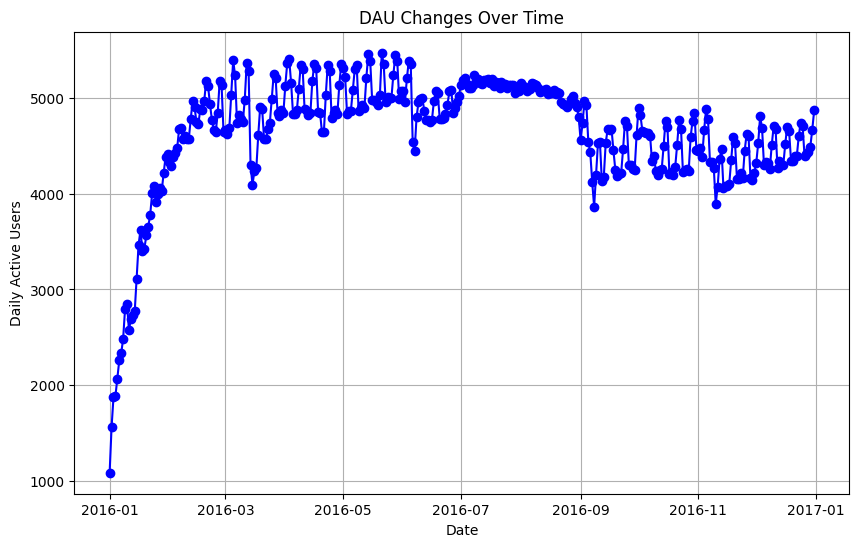

In [26]:
# Plotting of DAU changes over time

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dau_over_time.index, dau_over_time.values, marker='o', linestyle='-', color='b')
plt.title('DAU Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.grid(True)
plt.show()

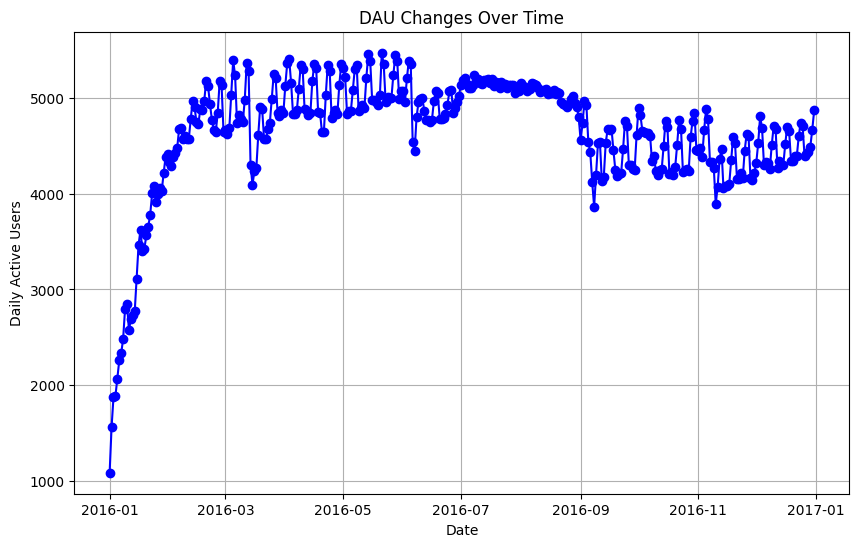

In [27]:
# Can you identify any trends in data?

fig = plt.figure(figsize=(10, 6))
plt.plot(dau_over_time.index, dau_over_time.values, marker='o', linestyle='-', color='b')
plt.title('DAU Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.grid(True)
plt.show()

In [28]:
# Calculate the rolling average with a window size of 7 (for a weekly trend)

rolling_avg = dau_over_time.rolling(window=7).mean()

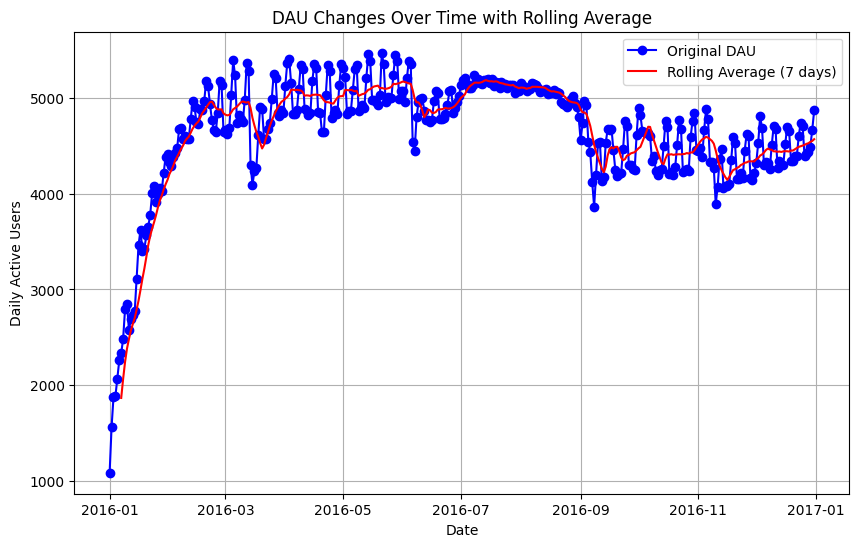

In [29]:
# Plot original DAU and rolling average

plt.figure(figsize=(10, 6))
plt.plot(dau_over_time.index, dau_over_time.values, marker='o', linestyle='-', color='b', label='Original DAU')
plt.plot(rolling_avg.index, rolling_avg.values, linestyle='-', color='r', label='Rolling Average (7 days)')
plt.title('DAU Changes Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Calculate z-scores to identify anomalies

z_scores = (dau_over_time - dau_over_time.mean()) / dau_over_time.std()

In [33]:
# Set a threshold for anomaly detection (e.g., z-score > 2 or < -2)

anomalies = dau_over_time[z_scores > 2]  # Adjust the threshold as needed

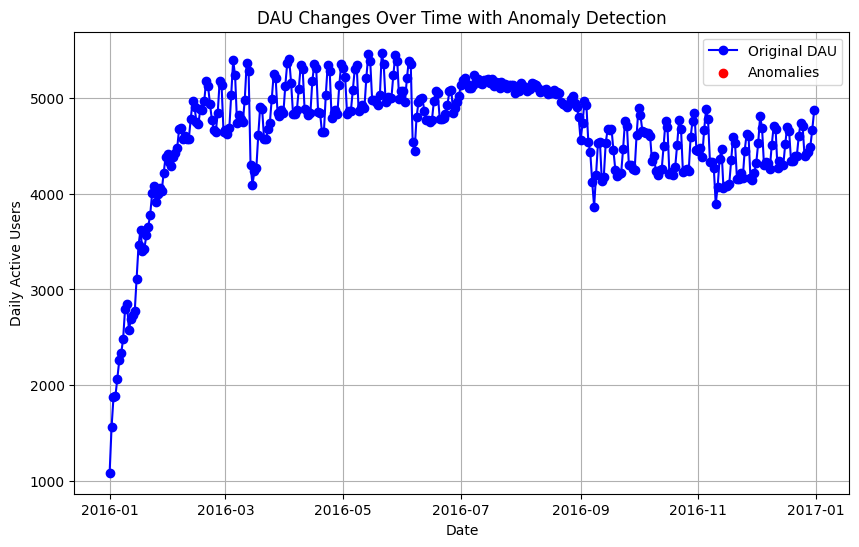

In [34]:
# Plot original DAU with identified anomalies

plt.figure(figsize=(10, 6))
plt.plot(dau_over_time.index, dau_over_time.values, marker='o', linestyle='-', color='b', label='Original DAU')
plt.scatter(anomalies.index, anomalies.values, color='r', label='Anomalies')
plt.title('DAU Changes Over Time with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.legend()
plt.grid(True)
plt.show()

# What do you think why do they happen ?
-> Changes in daily active users (DAUs) can be examined by considering various factors related to user behavior and external influences. Upswings, or increases can be due to seasonal factors such as holidays and weekends, successful marketing campaigns, exciting product releases or conversely, downswings can be technologically related information, vacation time, closure of promotions, or retention of users. External events, changes in the user experience, and competitor actions can affect DAU. A comprehensive review taking into consideration data integrity, cross-user and cross-functional reviews is needed to make appropriate decisions to identify the exact rationale behind these changes and provide them with use is effectively engaged

### Analyse Sales:-

###• Analyse the geographic split of the revenue and the users.

###• Calculate average revenue per user per market.

###• What are your observations of the results?

In [46]:
# Merge account and iap_purchase dataframes on 'account_id'

merged_df = pd.merge(account_df, iap_purchase_df, on='account_id', how='inner')

In [47]:
# Display the columns in the merged dFS

print("Merged DataFrame Columns:")
print(merged_df.columns)

Merged DataFrame Columns:
Index(['account_id', 'created_time_x', 'created_device', 'created_platform',
       'country_code', 'created_app_store_id', 'created_time_y',
       'package_id_hash', 'iap_price_usd_cents', 'app_store_id'],
      dtype='object')


In [56]:
# Check for potential column name discrepancies

if 'iap_price_usd_cents' in merged_df.columns:
    # Group by country code and calculate total revenue and unique users per country
    revenue_per_country = merged_df.groupby('country_code')['iap_price_usd_cents'].sum()
    users_per_country = merged_df.groupby('country_code')['account_id'].nunique()

In [57]:
# Calculate average revenue per user per market

avg_revenue_per_user = revenue_per_country / users_per_country

In [58]:
# Display results
print("\nGeographic Split of Revenue:")
print(revenue_per_country)


Geographic Split of Revenue:
country_code
AE       1953
AR        920
AT      28471
AU      45066
BE       1291
BH       1475
BR       8598
CA     254506
CH     182774
CN    1136507
CO      45860
CY        368
CZ       1289
DE      94621
DK       4976
DO        184
EG        110
ES      17581
FI       4061
FR     152739
GB     145086
GR       5543
ID        368
IE        552
IL        184
IN        184
IQ        368
IT      15230
JP      14041
KH        738
KR     463518
KW       2954
MX       6266
MY        184
NL       7598
NZ       6093
PA        184
PL       1399
PT       2211
RE       2033
RU      30102
SA      32092
SE      16420
SG       1290
TR     193339
UA       1473
US    1314818
VE        369
ZA       1478
Name: iap_price_usd_cents, dtype: int64


In [59]:
print("\nGeographic Split of Users:")
print(users_per_country)


Geographic Split of Users:
country_code
AE      2
AR      2
AT      1
AU     26
BE      3
BH      1
BR      6
CA     42
CH      9
CN    874
CO      1
CY      1
CZ      2
DE     32
DK      4
DO      1
EG      1
ES      5
FI      2
FR     56
GB     57
GR      2
ID      1
IE      1
IL      1
IN      1
IQ      2
IT      6
JP      3
KH      1
KR     72
KW      1
MX      9
MY      1
NL      5
NZ      1
PA      1
PL      2
PT      2
RE      1
RU     17
SA     10
SE      5
SG      2
TR     20
UA      2
US    248
VE      1
ZA      1
Name: account_id, dtype: int64


In [60]:
print("\nAverage Revenue Per User Per Market:")
print(avg_revenue_per_user)


Average Revenue Per User Per Market:
country_code
AE      976.500000
AR      460.000000
AT    28471.000000
AU     1733.307692
BE      430.333333
BH     1475.000000
BR     1433.000000
CA     6059.666667
CH    20308.222222
CN     1300.351259
CO    45860.000000
CY      368.000000
CZ      644.500000
DE     2956.906250
DK     1244.000000
DO      184.000000
EG      110.000000
ES     3516.200000
FI     2030.500000
FR     2727.482143
GB     2545.368421
GR     2771.500000
ID      368.000000
IE      552.000000
IL      184.000000
IN      184.000000
IQ      184.000000
IT     2538.333333
JP     4680.333333
KH      738.000000
KR     6437.750000
KW     2954.000000
MX      696.222222
MY      184.000000
NL     1519.600000
NZ     6093.000000
PA      184.000000
PL      699.500000
PT     1105.500000
RE     2033.000000
RU     1770.705882
SA     3209.200000
SE     3284.000000
SG      645.000000
TR     9666.950000
UA      736.500000
US     5301.685484
VE      369.000000
ZA     1478.000000
dtype: float64


In [61]:
import seaborn as sns

# style for viz

sns.set(style="whitegrid")

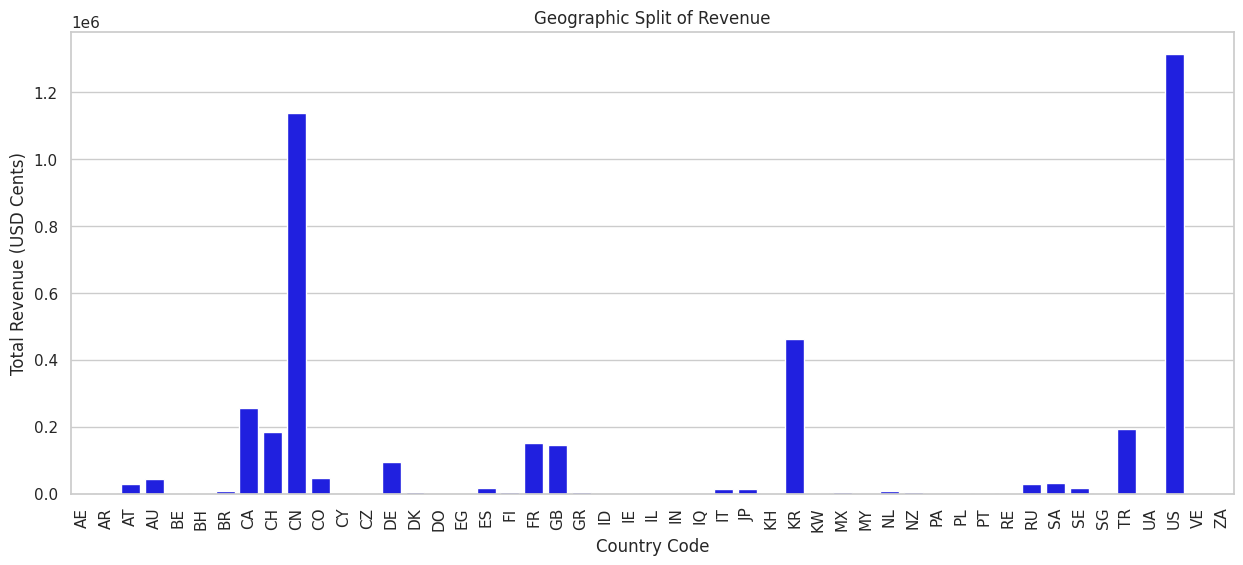

In [62]:
# Plot for the geographic split of revenue

plt.figure(figsize=(15, 6))
sns.barplot(x=revenue_per_country.index, y=revenue_per_country.values, color='blue')
plt.title('Geographic Split of Revenue')
plt.xlabel('Country Code')
plt.ylabel('Total Revenue (USD Cents)')
plt.xticks(rotation=90)
plt.show()

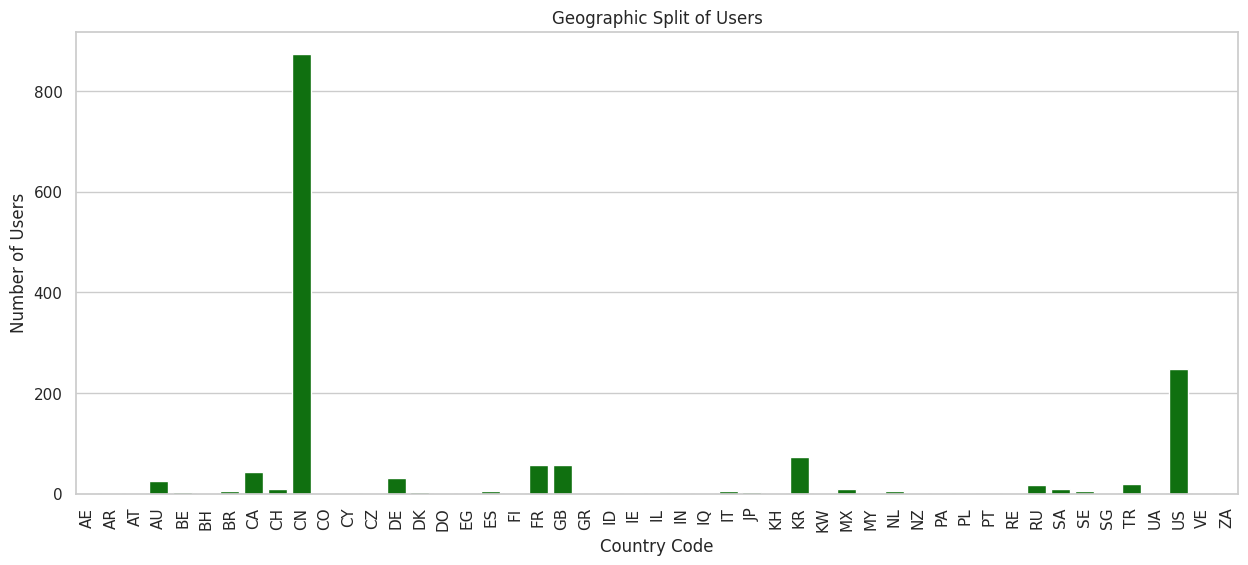

In [63]:
# Plot for the geographic split of users

plt.figure(figsize=(15, 6))
sns.barplot(x=users_per_country.index, y=users_per_country.values, color='green')
plt.title('Geographic Split of Users')
plt.xlabel('Country Code')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

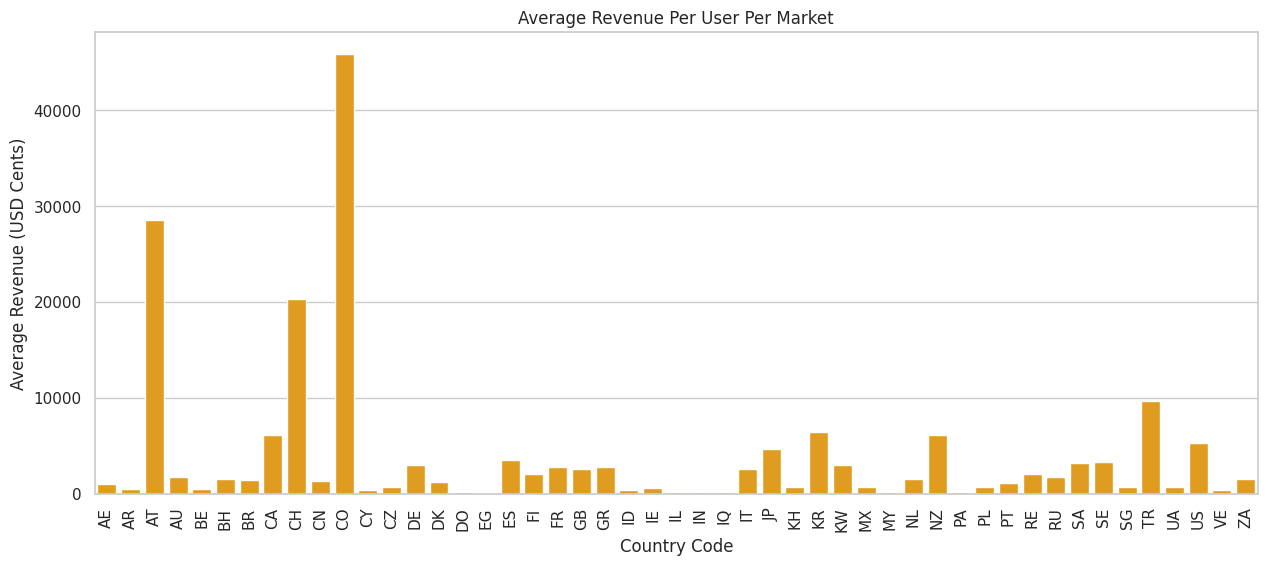

In [64]:
# Plot for the average revenue per user per market

plt.figure(figsize=(15, 6))
sns.barplot(x=avg_revenue_per_user.index, y=avg_revenue_per_user.values, color='orange')
plt.title('Average Revenue Per User Per Market')
plt.xlabel('Country Code')
plt.ylabel('Average Revenue (USD Cents)')
plt.xticks(rotation=90)
plt.show()

### • What are your observations of the results?
-> Analysis of sales data has revealed several notable trends. First, the geographical breakdown of revenue suggests that the app is especially useful in the United States, with China and South Korea making major contributions. These three markets stand out as major sources of revenue. Similarly, the distribution of users correlates well with income, with the U.S., China and South Korea boasting the highest number of users Notably, period with some European countries such as Austria and Switzerland exhibiting high per capita income, China and South Korea show comparatively high average incomes despite the population use is greater It was suggested that potential opportunities for adaptation and . Overall, understanding geographical trends in revenue and usage provides valuable insight into strategic decisions and targeted marketing efforts

# **THANK YOU**


